# HW-2 EDA
Wyatt Blair

SID: 10420296

2/26/24


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/breast-cancer-wisconsin.csv')
data.head(10)

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


## Missing values are denoted by a "?" character. For the time being I will replace these with NaN values, so it doesn't break the Numpy / Pandas functions later on

In [3]:
data.replace("?", np.NaN, inplace=True)
data['F6'] = data['F6'].astype(float)

## Summarize each column and replace missing values with the mean of that column

In [4]:
for column in data:
    print('='*50)
    print(f'{column}: ')
    series = data[column]

    mean, median =  series.mean(), series.median()
    data[column].fillna(mean, inplace=True)
    minimum, maximum, = series.min(), series.max()

    print(f'Minimum: {minimum} | Maximum: {maximum}')
    print(f'Mean: {mean} | Median: {median}')


Sample: 
Minimum: 61634 | Maximum: 13454352
Mean: 1071704.0987124464 | Median: 1171710.0
F1: 
Minimum: 1 | Maximum: 10
Mean: 4.417739628040057 | Median: 4.0
F2: 
Minimum: 1 | Maximum: 10
Mean: 3.13447782546495 | Median: 1.0
F3: 
Minimum: 1 | Maximum: 10
Mean: 3.207439198855508 | Median: 1.0
F4: 
Minimum: 1 | Maximum: 10
Mean: 2.8068669527896994 | Median: 1.0
F5: 
Minimum: 1 | Maximum: 10
Mean: 3.216022889842632 | Median: 2.0
F6: 
Minimum: 1.0 | Maximum: 10.0
Mean: 3.5446559297218156 | Median: 1.0
F7: 
Minimum: 1 | Maximum: 10
Mean: 3.4377682403433476 | Median: 3.0
F8: 
Minimum: 1 | Maximum: 10
Mean: 2.866952789699571 | Median: 1.0
F9: 
Minimum: 1 | Maximum: 10
Mean: 1.5894134477825466 | Median: 1.0
Class: 
Minimum: 2 | Maximum: 4
Mean: 2.6895565092989986 | Median: 2.0


## Frequency table of Class vs F6 columns

In [5]:
data.value_counts(['Class', 'F6']).reset_index().sort_values('Class')

,Class,F6,count
0,2,1.000000,387
17,2,8.000000,2
16,2,10.000000,3
14,2,4.000000,6
10,2,5.000000,10
7,2,3.544656,14
19,2,7.000000,1
2,2,2.000000,21
6,2,3.000000,14
5,4,1.000000,15


## Scatter plot of F1 to F6

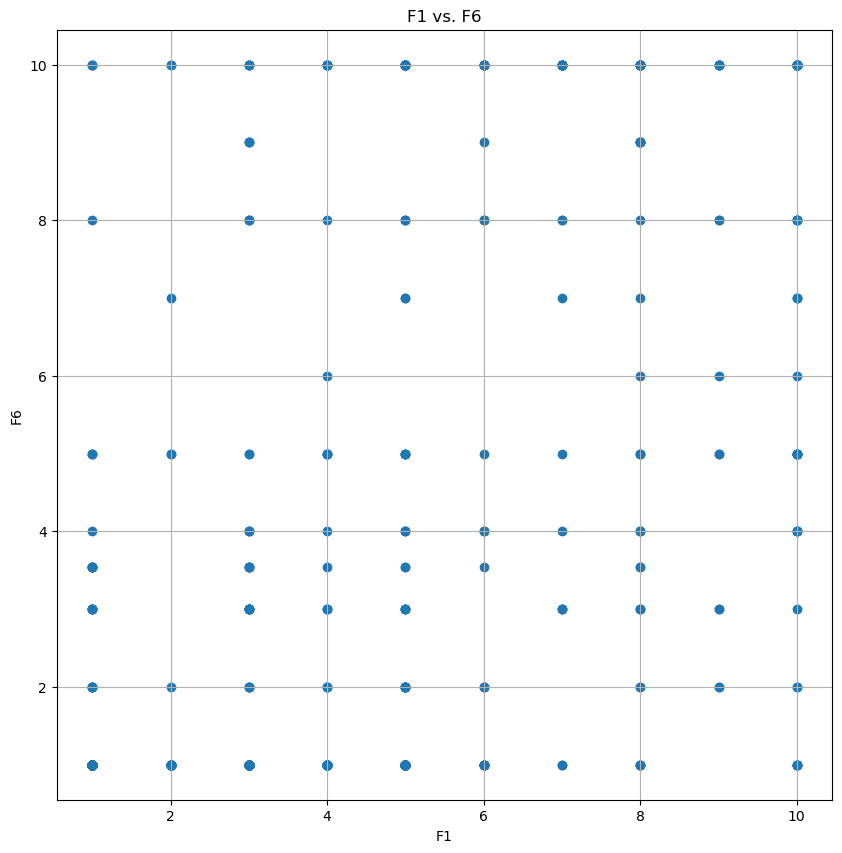

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.scatter(data['F1'], data['F6'])
ax.set_title('F1 vs. F6')
ax.set_xlabel('F1')
ax.set_ylabel('F6')

ax.grid()

plt.show()

## Histogram for F7, F8, and F9

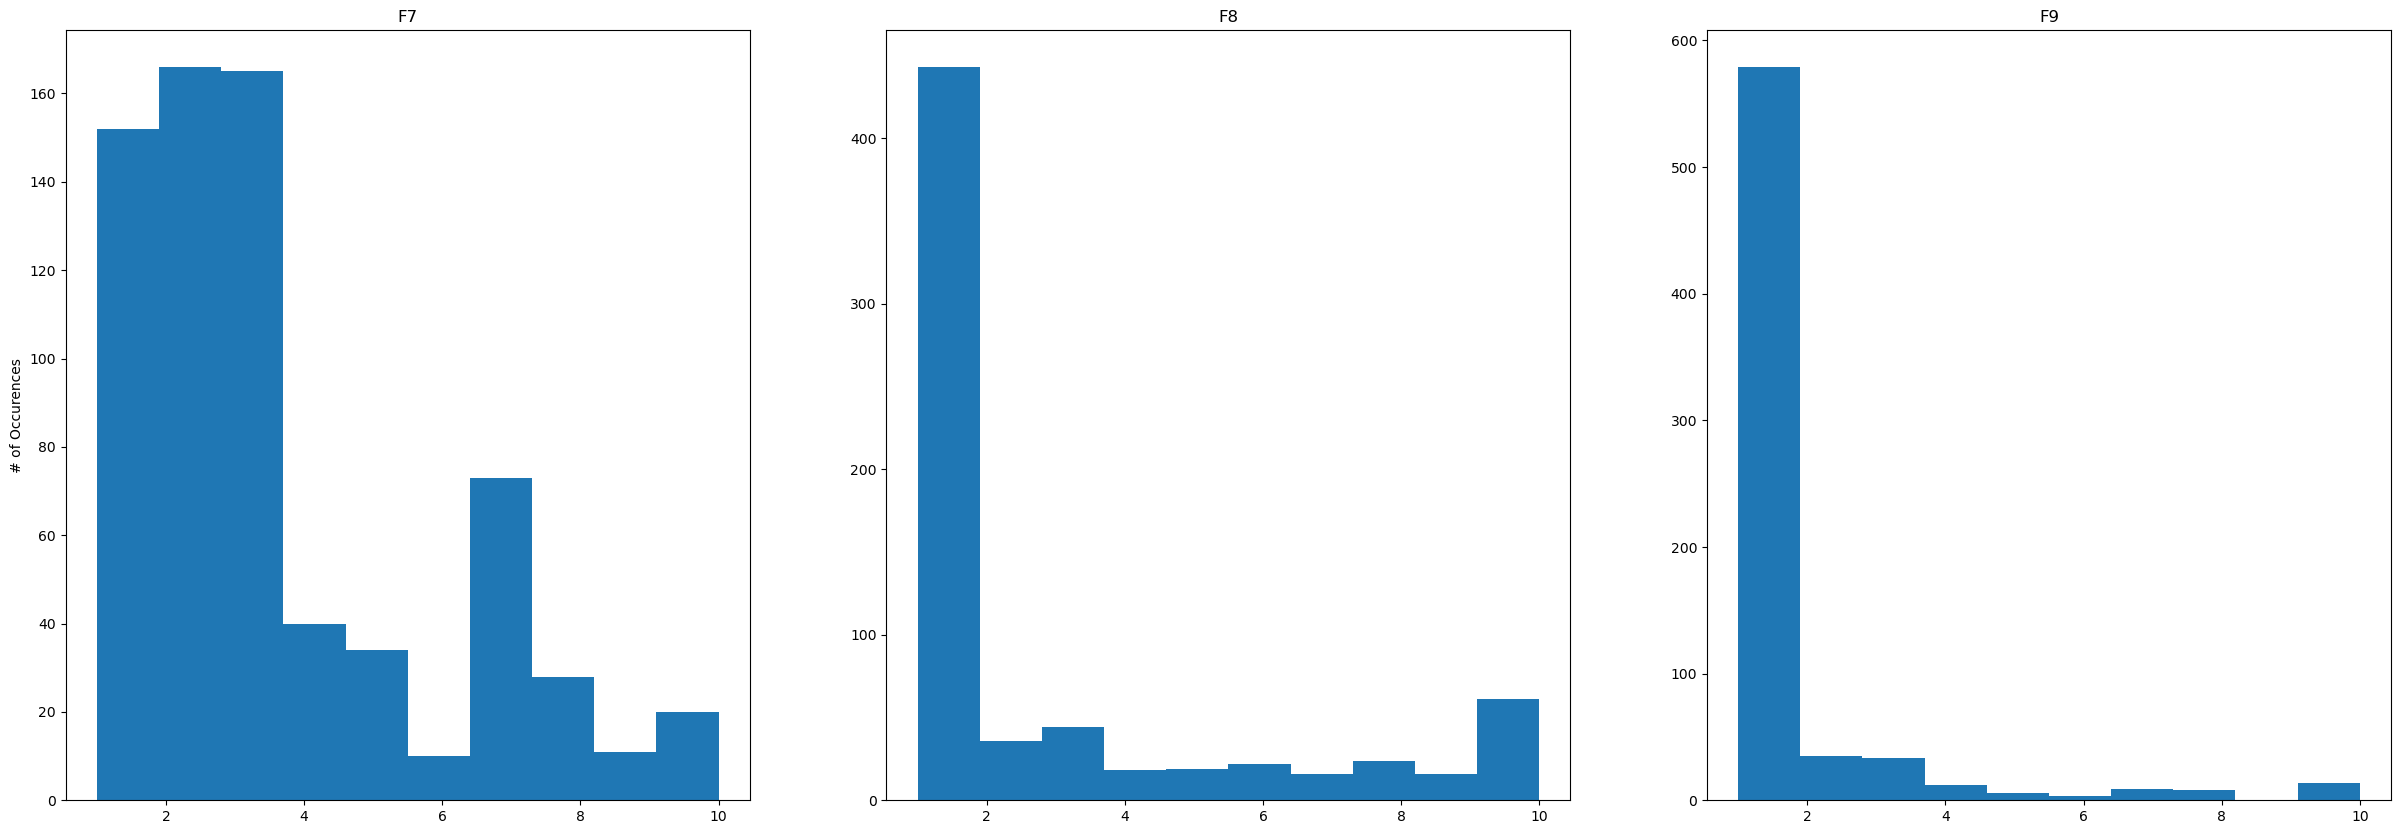

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
relevant_columns = ['F7', 'F8', 'F9']

for ind, (col, ax) in enumerate(zip(relevant_columns, axs)):

    if ind == 0:
        ax.set_ylabel('# of Occurences')
        
    ax.hist(data[col])
    ax.set_title(col)

plt.show()